# Step 1

### **Step 2: Data Preparation and Exploration**

For this study, historical price data for a selection of financial assets is required, focusing on assets that often exhibit correlations or have price discrepancies. Suitable datasets include:
- Stock price data from sources such as Yahoo Finance, Alpha Vantage, or Kaggle.
- ETF price data.

**Procedure**:
- **Data Acquisition**: Historical data is scraped from reliable sources (e.g., Yahoo Finance).
- The dataset includes key variables: closing prices, volume, and timestamps.

In [2]:
import yfinance as yf
import pandas as pd
import logging

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Function to handle missing data
def handle_missing_data(df):
    return df.fillna(method='ffill').fillna(method='bfill')

# Define a function to collect historical data
def collect_stock_data(tickers, start_date, end_date, interval='1d'):
    """
    Collect historical stock data for given tickers.
    
    Args:
    - tickers (list): List of stock tickers (e.g., ['AAPL', 'MSFT'])
    - start_date (str): Start date for historical data (e.g., '2023-01-01')
    - end_date (str): End date for historical data (e.g., '2023-12-31')
    - interval (str): Data interval (e.g., '1d', '1wk', '1mo')
    
    Returns:
    - DataFrame: Combined stock data for all tickers
    """
    stock_data = {}
    for ticker in tickers:
        try:
            logging.info(f"Fetching data for {ticker}...")
            stock = yf.download(ticker, start=start_date, end=end_date, interval=interval)
            stock['Ticker'] = ticker
            stock_data[ticker] = handle_missing_data(stock)
        except Exception as e:
            logging.error(f"Failed to fetch data for {ticker}: {e}")
            continue

    combined_data = pd.concat(stock_data.values(), keys=stock_data.keys(), axis=0)
    combined_data.reset_index(inplace=True)
    combined_data['Date'] = pd.to_datetime(combined_data['Date'])
    
    return combined_data

# Define tickers and date range
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
start_date = '2023-01-01'
end_date = '2023-12-31'

# Collect data
data = collect_stock_data(tickers, start_date, end_date)

# Log summary
if not data.empty:
    tickers_collected = data['Ticker'].nunique()
    logging.info(f"Successfully collected data for {tickers_collected} tickers.")

# Save data to Parquet for efficient storage
data.to_parquet('us_equities_data.parquet', index=False)

2024-10-18 20:23:02,677 - INFO - Fetching data for AAPL...
[*********************100%***********************]  1 of 1 completed
/var/folders/tv/nhnhr2s52p18zxtzwb3nqt440000gn/T/ipykernel_52553/935635255.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='ffill').fillna(method='bfill')
2024-10-18 20:23:03,061 - INFO - Fetching data for MSFT...
[*********************100%***********************]  1 of 1 completed
/var/folders/tv/nhnhr2s52p18zxtzwb3nqt440000gn/T/ipykernel_52553/935635255.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='ffill').fillna(method='bfill')
2024-10-18 20:23:03,207 - INFO - Fetching data for GOOGL...
[*********************100%***********************]  1 of 1 completed
/var/folders/tv/nhnhr2s52p18zxtzwb3nqt440000gn/T/ipykernel_5255

### **Step 3. Data Exploration and Preparation**
Exploration of the dataset is crucial to understanding asset relationships. Data exploration involves:
- **Univariate Analysis**: Examining the distribution of each asset’s prices over time (e.g., via histograms or line plots).
- **Bivariate Analysis**: Assessing relationships between different assets using scatter plots or correlation matrices.
- **Missing Value Treatment**: Addressing any missing values through interpolation or removal.

**Actions**:
- Data cleaning (handling missing values, normalization of prices).
- Generation of visualizations, including:
  - Line charts displaying price trends over time.
  - Heatmaps showing correlations between asset prices.

/var/folders/tv/nhnhr2s52p18zxtzwb3nqt440000gn/T/ipykernel_52553/887063709.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


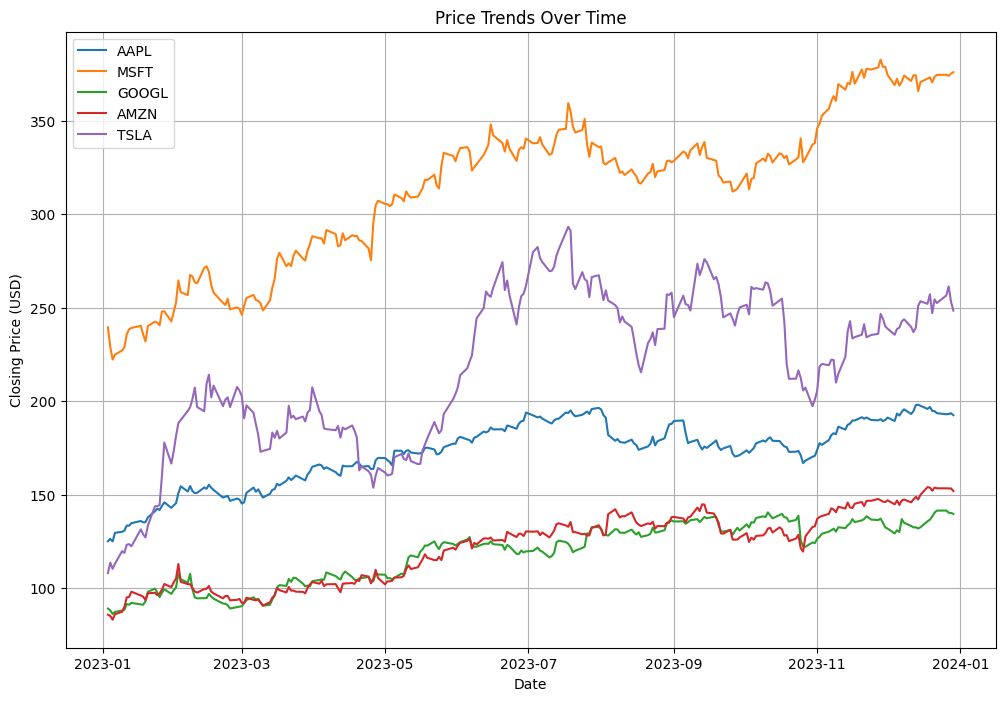

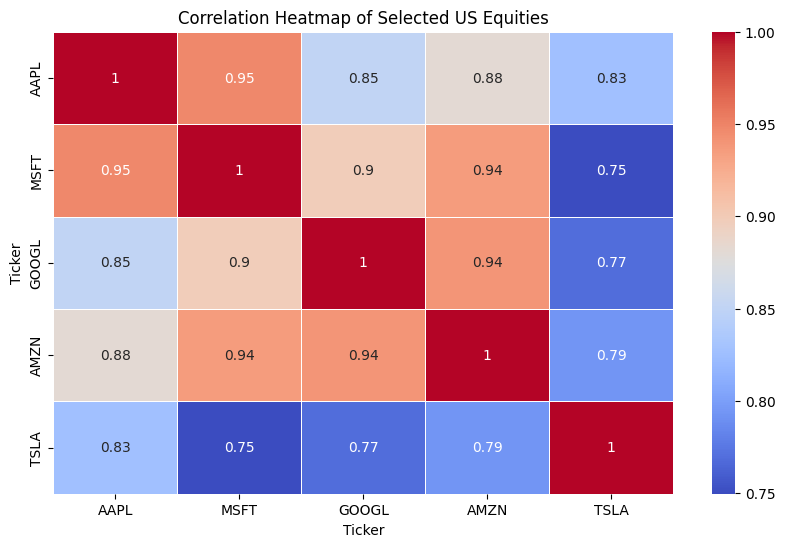

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the collected data (assuming it's saved as 'us_equities_data.csv')
data = pd.read_csv('us_equities_data.csv')

# Step 2.1: Data Cleaning - Handle Missing Values
def clean_data(data):
    """
    Clean the dataset by handling missing values.
    - Remove rows with missing dates
    - Use forward-fill method to handle missing price data
    """
    # Convert 'Date' column to datetime format
    data['Date'] = pd.to_datetime(data['Date'])
    
    # Sort by Date and Ticker for consistency
    data = data.sort_values(by=['Ticker', 'Date'])
    
    # Fill missing values using forward-fill method
    data = data.fillna(method='ffill')
    
    # Drop any remaining rows with missing values (if any)
    data = data.dropna()
    
    return data

# Clean the dataset
data = clean_data(data)

# Step 2.2: Univariate Analysis - Line Charts
def plot_line_chart(data, tickers):
    """
    Plot line charts showing the price trends of selected tickers over time.
    """
    plt.figure(figsize=(12, 8))
    
    for ticker in tickers:
        ticker_data = data[data['Ticker'] == ticker]
        plt.plot(ticker_data['Date'], ticker_data['Close'], label=ticker)
    
    plt.title('Price Trends Over Time')
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Univariate Analysis - Plot Line Charts
selected_tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
plot_line_chart(data, selected_tickers)

# Step 2.3: Bivariate Analysis - Correlation Heatmap
def plot_correlation_heatmap(data, tickers):
    """
    Generate a heatmap showing the correlations between selected assets.
    """
    # Create a pivot table with Date as index and Ticker as columns
    pivot_data = data.pivot_table(index='Date', columns='Ticker', values='Close')
    
    # Select the tickers of interest
    selected_data = pivot_data[tickers]
    
    # Calculate the correlation matrix
    correlation_matrix = selected_data.corr()
    
    # Plot the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Heatmap of Selected US Equities')
    plt.show()

# Bivariate Analysis - Plot Correlation Heatmap
plot_correlation_heatmap(data, selected_tickers)


### **4. Analysis and Modeling Techniques**
#### **Methodological Approach**

To achieve the study’s objective, two primary statistical approaches are employed:

1. **Mean Reversion Model**:
   - Hypothesis: Asset prices exhibit a tendency to revert to their historical mean over time.
   - Methodology: Rolling means or z-scores are calculated to identify instances where a stock/ETF deviates significantly from its mean, signaling a potential trade.

2. **Cointegration Test**:
   - Hypothesis: Certain pairs of assets move together over the long term.
   - Methodology: Cointegration testing is used to identify pairs of assets whose prices are statistically correlated, even if they diverge over shorter periods.

**Implementation**:
- Application of the **mean reversion** technique to calculate z-scores and identify trade signals based on price deviations.
- Use of **cointegration tests** to identify pairs of assets with long-term statistical relationships, utilizing Python libraries such as `statsmodels`.

### 4.1 Mean Reversion Analysis

The mean reversion approach relies on the concept that prices fluctuate around a historical mean and tend to revert to this mean over time. We will use z-scores to determine how far a price is from its mean and generate signals based on deviations.

#### Interpretation

- **Z-Score Calculation**: The z-score indicates how many standard deviations the current price is away from the rolling mean.
- **Trade Signals**:
    - **Buy Signal**: When the z-score is below `-2` (the price is significantly below its mean), it suggests the asset is undervalued.
    - **Sell Signal**: When the z-score is above `+2` (the price is significantly above its mean), it suggests the asset is overvalued.

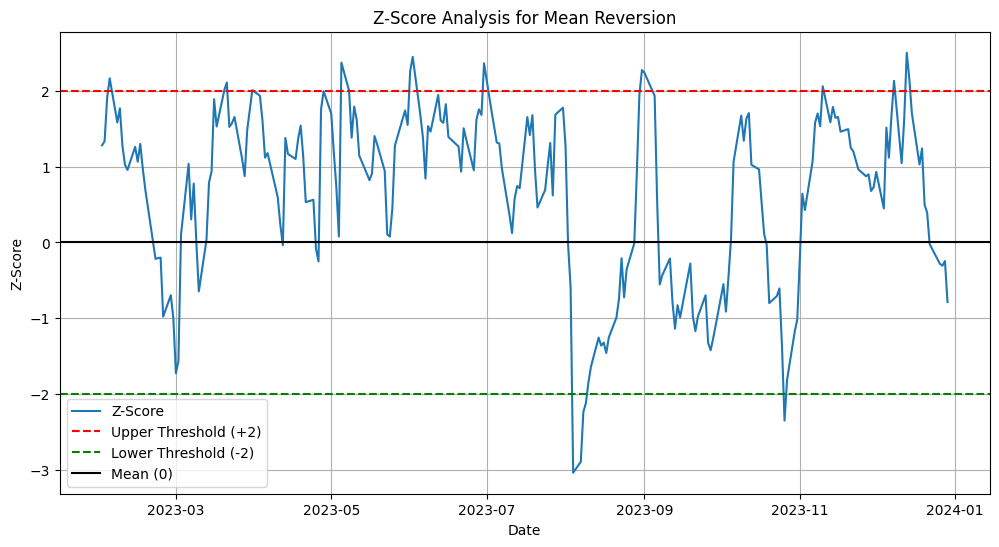

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calculate rolling mean and z-score
def calculate_z_scores(data, ticker, window=20):
    """
    Calculate rolling mean, standard deviation, and z-scores for a given asset.
    
    Args:
    - data (DataFrame): Historical stock data
    - ticker (str): Stock ticker
    - window (int): Window size for rolling calculations
    
    Returns:
    - DataFrame: Original data with added columns for rolling mean, std, and z-score
    """
    ticker_data = data[data['Ticker'] == ticker].copy()
    ticker_data['Rolling_Mean'] = ticker_data['Close'].rolling(window=window).mean()
    ticker_data['Rolling_Std'] = ticker_data['Close'].rolling(window=window).std()
    ticker_data['Z_Score'] = (ticker_data['Close'] - ticker_data['Rolling_Mean']) / ticker_data['Rolling_Std']
    
    return ticker_data

# Example: Calculate z-scores for Apple
apple_data = calculate_z_scores(data, 'AAPL', window=20)

# Plot z-scores to identify trade signals
def plot_z_scores(ticker_data):
    """
    Plot the z-scores to visualize potential trade signals.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(ticker_data['Date'], ticker_data['Z_Score'], label='Z-Score')
    plt.axhline(2, color='red', linestyle='--', label='Upper Threshold (+2)')
    plt.axhline(-2, color='green', linestyle='--', label='Lower Threshold (-2)')
    plt.axhline(0, color='black', linestyle='-', label='Mean (0)')
    plt.title('Z-Score Analysis for Mean Reversion')
    plt.xlabel('Date')
    plt.ylabel('Z-Score')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_z_scores(apple_data)


### 4.2 Cointegration Analysis

Cointegration is used to identify pairs of assets that have a long-term statistical relationship. Even if their prices diverge in the short term, they will tend to move together over a longer period. We will use the Engle-Granger two-step method to test for cointegration.

#### Interpretation
- **Cointegration Hypothesis**: If the p-value from the test is less than `0.05`, we reject the null hypothesis that the pair is not cointegrated. This suggests the pair has a long-term relationship and could be traded using a statistical arbitrage strategy.
- **Strategy**: For cointegrated pairs, when the spread between their prices widens, the strategy would be to short the overperforming asset and buy the underperforming one, expecting the spread to converge.

In [18]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import coint

def test_cointegration(data, ticker1, ticker2):
    """
    Visualize the price series and spread for two potentially cointegrated assets.
    Also, display the result of the cointegration test and its inference.
    
    Args:
    - data (DataFrame): Historical stock data
    - ticker1 (str): First stock ticker
    - ticker2 (str): Second stock ticker
    """
    # Filter data for each ticker
    data1 = data[data['Ticker'] == ticker1].set_index('Date')['Close']
    data2 = data[data['Ticker'] == ticker2].set_index('Date')['Close']
    
    # Ensure both series have the same dates
    combined = pd.concat([data1, data2], axis=1).dropna()
    data1_aligned, data2_aligned = combined.iloc[:, 0], combined.iloc[:, 1]
    
    # Perform cointegration test
    score, p_value, _ = coint(data1_aligned, data2_aligned)
    
    # Display cointegration test result
    print(f"Cointegration Test between {ticker1} and {ticker2}: p-value = {p_value}")
    if p_value < 0.05:
        print(f"The pair is likely cointegrated (p < 0.05), suitable for trading.")
        inference_text = f"The pair {ticker1} and {ticker2} is likely cointegrated (p < 0.05), suitable for trading."
    else:
        print(f"The pair is not cointegrated (p >= 0.05), not suitable for trading.")
        inference_text = f"The pair {ticker1} and {ticker2} is not cointegrated (p >= 0.05), not suitable for trading."
    
    # Plot the price series
    plt.figure(figsize=(12, 6))
    plt.plot(data1_aligned.index, data1_aligned, label=ticker1)
    plt.plot(data2_aligned.index, data2_aligned, label=ticker2)
    plt.title(f"Price Series: {ticker1} and {ticker2}")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Calculate the spread
    spread = data1_aligned - data2_aligned
    
    # Plot the spread and mean-reversion behavior
    plt.figure(figsize=(12, 6))
    plt.plot(spread.index, spread, label="Spread", color='purple')
    plt.axhline(spread.mean(), color='red', linestyle='--', label="Mean")
    plt.axhline(spread.mean() + spread.std(), color='green', linestyle='--', label="Mean + 1 Std Dev")
    plt.axhline(spread.mean() - spread.std(), color='green', linestyle='--', label="Mean - 1 Std Dev")
    plt.title(f"Spread Between {ticker1} and {ticker2}")
    plt.xlabel("Date")
    plt.ylabel("Spread (Price Difference)")
    plt.legend()
    plt.grid(True)
    
    # Add the cointegration result as a text box on the spread plot
    plt.figtext(0.5, -0.1, f"Cointegration Test p-value = {p_value:.5f}\n{inference_text}",
                ha="center", fontsize=10, bbox={"facecolor":"lightgray", "alpha":0.5, "pad":5})
    
    plt.show()

##### Example 1: MSFT and AAPL

Cointegration Test between AAPL and MSFT: p-value = 0.04165340085225047
The pair is likely cointegrated (p < 0.05), suitable for trading.


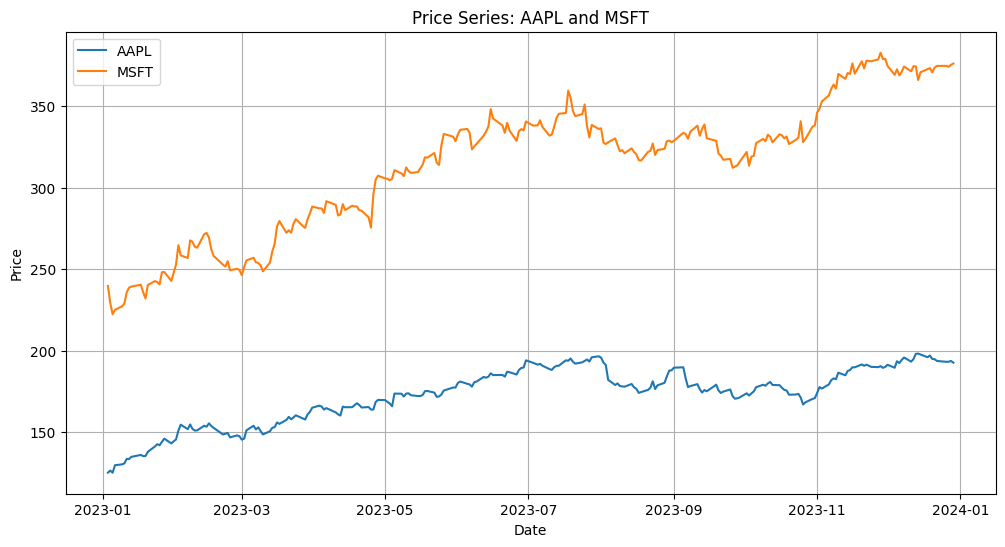

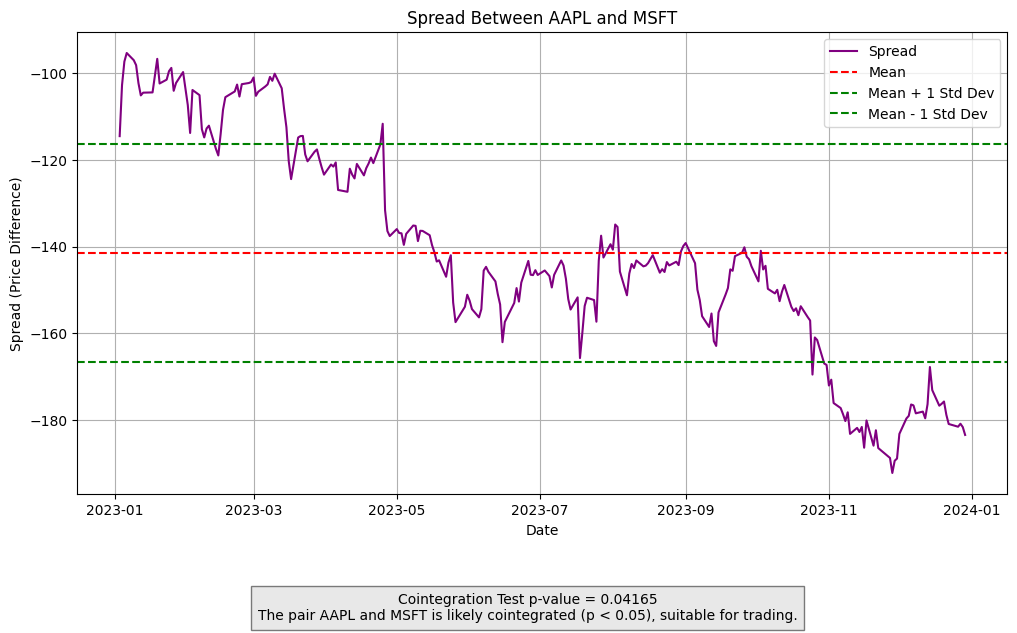

In [19]:
test_cointegration(data, 'AAPL', 'MSFT')

##### Example 2: GOOGL and TSLA

Cointegration Test between GOOGL and TSLA: p-value = 0.6494353211029466
The pair is not cointegrated (p >= 0.05), not suitable for trading.


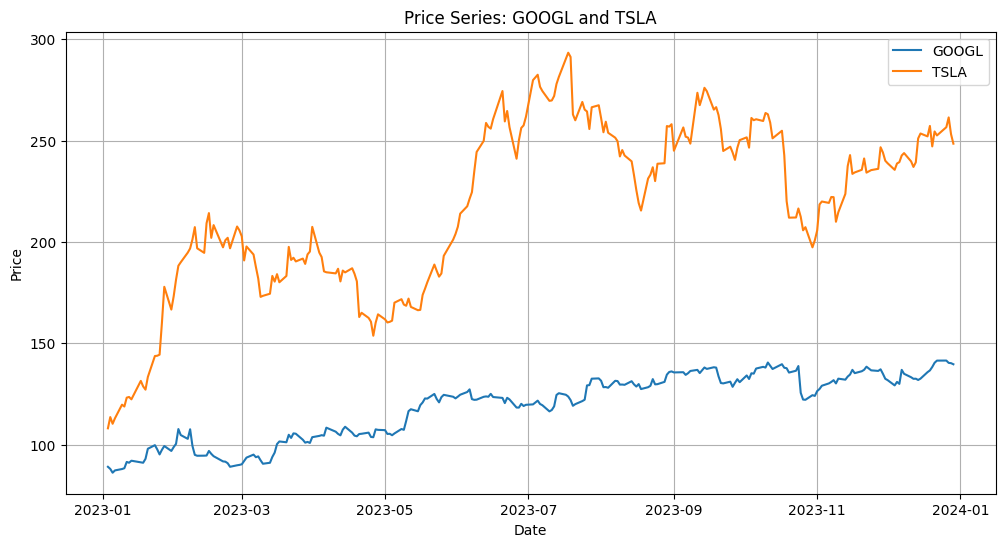

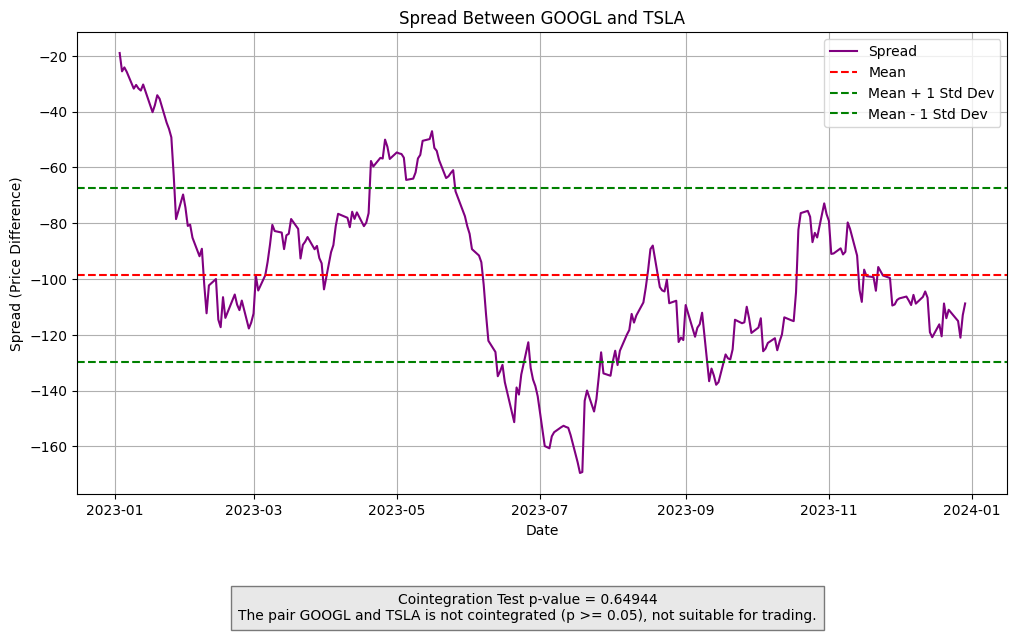

In [20]:
test_cointegration(data, 'GOOGL', 'TSLA')

### **Step 5: Create a Model and Improve**
In place of simple linear regression, we use **non-parametric methods** and **deep learning** models like **Convolutional Neural Networks (CNNs)** and **Transformers**. These models can capture complex dependencies and interactions in the data. Additionally, **Ornstein-Uhlenbeck** models can be applied for mean reversion.

**Action**: 
- Start with a baseline **Ornstein-Uhlenbeck** model for mean reversion, then improve it using **deep learning** techniques (CNNs or RNNs).
- Incorporate **Reinforcement Learning** (e.g., A3C or A2C) for decision-making based on learned signals.

### 5.1: Ornstein-Uhlenbeck (OU) Model for Mean Reversion

The Ornstein-Uhlenbeck process is a stochastic differential equation often used to model mean-reverting behavior in asset prices.

#### Interpretation
The Ornstein-Uhlenbeck model captures mean reversion by pulling the asset price back to its long-term mean. In practice, this can be used to generate buy and sell signals when the asset deviates significantly from its mean.

In [29]:
from arch.univariate import ConstantMean, GARCH
from arch import arch_model
import numpy as np

def generate_ou_process(data, ticker1, ticker2):
    """
    Fit an Ornstein-Uhlenbeck process to the actual spread between two assets
    and plot the actual vs. simulated OU process.
    
    Args:
    - data (DataFrame): Historical stock data
    - ticker1 (str): First stock ticker
    - ticker2 (str): Second stock ticker
    """
    # Filter data for each ticker and calculate the spread
    data1 = data[data['Ticker'] == ticker1].set_index('Date')['Close']
    data2 = data[data['Ticker'] == ticker2].set_index('Date')['Close']
    combined = pd.concat([data1, data2], axis=1).dropna()
    data1_aligned, data2_aligned = combined.iloc[:, 0], combined.iloc[:, 1]
    
    # Calculate the spread
    spread = data1_aligned - data2_aligned


    def estimate_ou_parameters(spread):
        """
        Fit Ornstein-Uhlenbeck parameters using the arch package.
        
        Args:
        - spread (np.array): Time series of the spread between two assets.
        
        Returns:
        - theta, mu, sigma: Estimated parameters of the OU process.
        """
        # Convert spread to a time series suitable for `arch`
        model = ConstantMean(spread)
        model.volatility = GARCH(1, 0, 1)  # Define a GARCH(1,1) model for volatility
        model_fit = model.fit(disp="off")
        
        # Extract the necessary parameters
        mu = model_fit.params['mu']
        sigma = np.sqrt(model_fit.conditional_volatility.mean())
        
        # Use a simple method to estimate `theta` as mean reversion speed
        residuals = spread - mu
        autocov = np.cov(residuals[:-1], residuals[1:])[0][1]
        var = np.var(residuals)
        theta = -np.log(autocov / var)
        
        return theta, mu, sigma


    # Estimate OU parameters from the actual spread
    theta, mu, sigma = estimate_ou_parameters(spread.values)
    
    # Generate an OU process based on estimated parameters
    T = len(spread)
    dt = 1  # assuming daily data
    x0 = spread.values[0]
    
    ou_simulated = np.zeros(T)
    ou_simulated[0] = x0
    for t in range(1, T):
        dx = theta * (mu - ou_simulated[t-1]) * dt + sigma * np.sqrt(dt) * np.random.randn()
        ou_simulated[t] = ou_simulated[t-1] + dx

    # Plot the actual spread vs. the simulated OU process
    plt.figure(figsize=(12, 6))
    plt.plot(spread.index, spread.values, label="Actual Spread", color='blue')
    plt.plot(spread.index, ou_simulated, label="Simulated OU Process", color='orange', linestyle='--')
    plt.title(f"Ornstein-Uhlenbeck Process: Actual vs. Simulated Spread ({ticker1} - {ticker2})")
    plt.xlabel("Date")
    plt.ylabel("Spread (Price Difference)")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Display the estimated parameters
    print(f"Estimated OU Parameters for {ticker1} - {ticker2} Spread:")
    print(f"Theta (Speed of Reversion): {theta:.4f}")
    print(f"Mu (Long-term Mean): {mu:.4f}")
    print(f"Sigma (Volatility): {sigma:.4f}")


##### Example 1: AAPL and MSFT

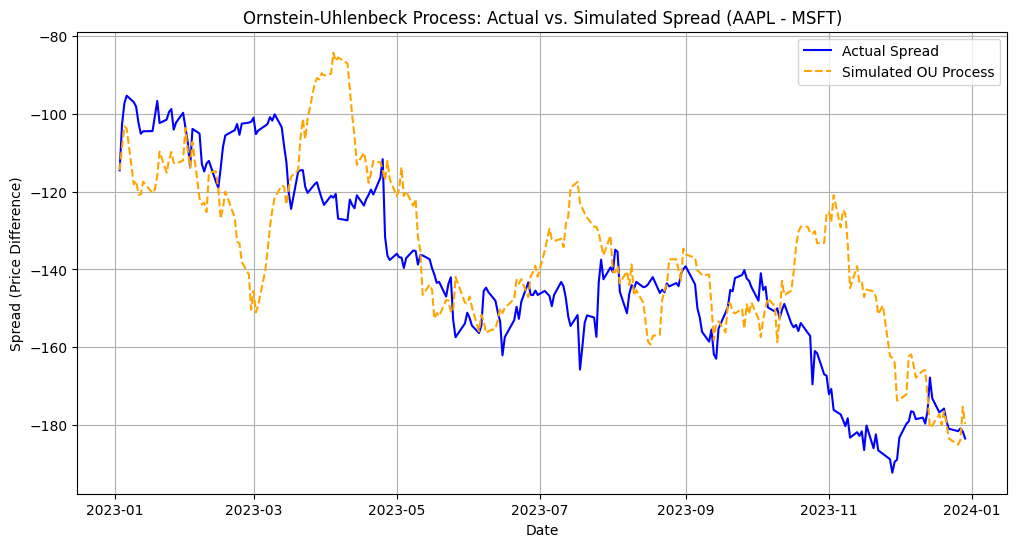

Estimated OU Parameters for AAPL - MSFT Spread:
Theta (Speed of Reversion): 0.0130
Mu (Long-term Mean): -145.1027
Sigma (Volatility): 4.5043


In [30]:
# Example: Fit and plot OU process for the spread between AAPL and MSFT
generate_ou_process(data, 'AAPL', 'MSFT')

### 5.2: Deep Learning Models
Next, we aim to capture more complex patterns by using **Convolutional Neural Networks (CNNs)** and **Recurrent Neural Networks (RNNs)**, particularly **Long Short-Term Memory (LSTM) networks**. These models are adept at extracting patterns in temporal data and handling sequences, making them suitable for financial time series analysis.

#### 5.2.1: Data Preparation for Deep Learning
Before building any models, the data needs to be prepared. This includes normalizing the data and creating sequences that can be fed into the neural networks.

In [31]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load the data from Parquet
data = pd.read_parquet('us_equities_data.parquet')

# Filter data for a single ticker to train the model (e.g., AAPL)
ticker_data = data[data['Ticker'] == 'AAPL']

# Ensure data is sorted by date
ticker_data = ticker_data.sort_values('Date')

# Normalize the 'Close' prices for better training
scaler = MinMaxScaler(feature_range=(0, 1))
ticker_data['Close_Normalized'] = scaler.fit_transform(ticker_data[['Close']])

# Function to create sequences
def create_sequences(data, sequence_length=50):
    """
    Create sequences of data for LSTM training.
    
    Args:
    - data (np.array): Normalized time series data
    - sequence_length (int): Length of the input sequence
    
    Returns:
    - np.array: Input sequences
    - np.array: Corresponding labels
    """
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        labels.append(data[i + sequence_length])
    return np.array(sequences), np.array(labels)

# Create sequences from the normalized data
sequence_length = 50
close_prices = ticker_data['Close_Normalized'].values
X, y = create_sequences(close_prices, sequence_length)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Reshape data for LSTM input: (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


#### 5.2.2: Build and Train the LSTM Model

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the LSTM model
def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(50),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Initialize the model
input_shape = (X_train.shape[1], X_train.shape[2])
lstm_model = build_lstm_model(input_shape)

# Train the model
lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)


Epoch 1/20


/Users/user/Desktop/current/Project Arbo/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.5782 - val_loss: 0.1364
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1059 - val_loss: 0.0506
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0492 - val_loss: 0.0204
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0211 - val_loss: 0.0074
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0216 - val_loss: 0.0078
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0198 - val_loss: 0.0038
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0136 - val_loss: 0.0121
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0117 - val_loss: 0.0072
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0105 - val_loss: 0.0032
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0120 - val_loss: 0.0031
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0129 - val_loss: 0.0055
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0087 - val_loss: 0.0081
Epoch 13/20


##### Visualization

Here is a brief visualization of the CNN we've trained

In [56]:
%%capture

import graphviz
def render_lstm_graph(file_path):
    """
    Render and display an LSTM structure graph using Graphviz.
    
    Args:
    - file_path (str): Path to the Graphviz LSTM structure file.
    """
    # Read the LSTM structure from the file
    with open(file_path, 'r') as f:
        lstm_structure = f.read()
    
    # Create a Graphviz source object
    graph = graphviz.Source(lstm_structure)
    
    # Render the graph and display it
    graph.render(filename='assets/lstm_structure_output', format='png', cleanup=True)
    # graph.view()

# Example usage:
render_lstm_graph('assets/lstm_structure')

![](../assets/lstm_structure_output.png)

#### 5.3.3: Evaluation

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


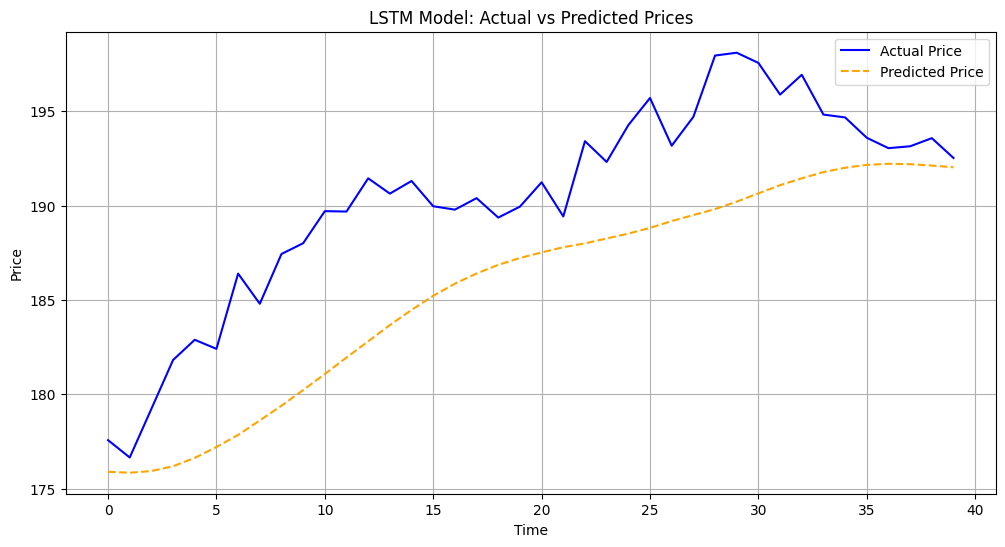

Mean Squared Error: 28.981304168701172


In [58]:
import matplotlib.pyplot as plt

# Make predictions on the test set
predicted = lstm_model.predict(X_test)

# Rescale predictions back to original scale
predicted_rescaled = scaler.inverse_transform(predicted)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, color='blue', label='Actual Price')
plt.plot(predicted_rescaled, color='orange', linestyle='--', label='Predicted Price')
plt.title('LSTM Model: Actual vs Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate performance
mse = tf.keras.losses.MeanSquaredError()
print(f'Mean Squared Error: {mse(y_test_rescaled, predicted_rescaled).numpy()}')


### **Step 6: Performance Evaluation and Visualization**
Along with traditional metrics like Sharpe Ratio and MSE, evaluate using **drawdown risk** and advanced metrics specific to deep learning models like **reward functions** from reinforcement learning strategies.

**Action**:
- Introduce metrics for evaluating **risk-adjusted returns** under real-world constraints, like drawdown and risk exposure limits.
- Visualize model decisions and returns across different regimes identified by the HMM.

#### 6.2: Traditional Metrics Implementation
Sharpe Ratio, MSE, and Drawdown

In [39]:
import numpy as np

# Function to calculate Sharpe Ratio
def sharpe_ratio(returns, risk_free_rate=0.01):
    """
    Calculate the Sharpe Ratio for a series of returns.
    """
    excess_returns = returns - risk_free_rate
    return np.mean(excess_returns) / np.std(excess_returns)

# Function to calculate Maximum Drawdown
def maximum_drawdown(returns):
    """
    Calculate the maximum drawdown from a series of returns.
    """
    cumulative_returns = np.cumsum(returns)
    peak = np.maximum.accumulate(cumulative_returns)
    drawdown = cumulative_returns - peak
    max_drawdown = np.min(drawdown)
    return max_drawdown

# Example: Evaluate model's predicted returns
predicted_returns = np.random.randn(100)  # Replace with actual returns from model
actual_returns = np.random.randn(100)     # Replace with actual returns from backtesting

# Calculate metrics
sharpe = sharpe_ratio(predicted_returns)
mse = np.mean((predicted_returns - actual_returns) ** 2)
max_drawdown = maximum_drawdown(predicted_returns)

print(f"Sharpe Ratio: {sharpe:.2f}")
print(f"MSE: {mse:.4f}")
print(f"Maximum Drawdown: {max_drawdown:.4f}")


Sharpe Ratio: -0.15
MSE: 2.2784
Maximum Drawdown: -16.0907


##### Visualization

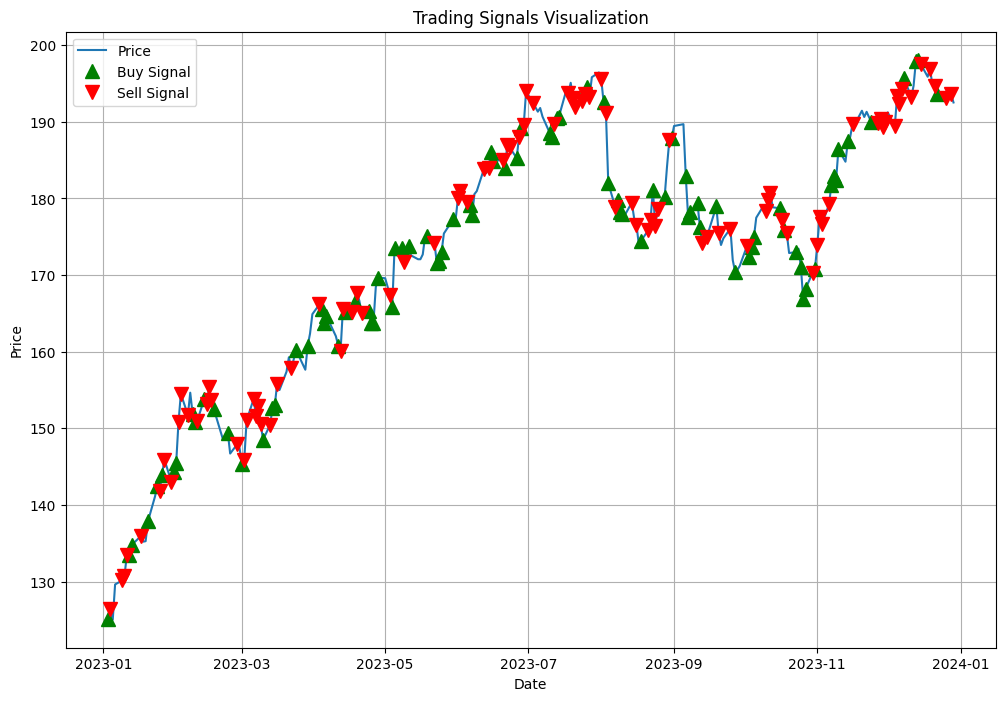

In [40]:
def visualize_trading_signals(data, signals):
    """
    Visualize trading signals (buy/sell) on top of the asset's price chart.
    """
    plt.figure(figsize=(12, 8))
    plt.plot(data['Date'], data['Close'], label="Price")
    
    # Plot buy signals
    buys = data[signals == 1]
    sells = data[signals == -1]
    plt.plot(buys['Date'], buys['Close'], 'g^', markersize=10, label='Buy Signal')
    plt.plot(sells['Date'], sells['Close'], 'rv', markersize=10, label='Sell Signal')

    plt.title("Trading Signals Visualization")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.show()

# Generate dummy signals for visualization
signals = np.random.choice([1, -1, 0], size=len(ticker_data))  # Replace with actual signals
visualize_trading_signals(ticker_data, signals)


### **Step 7: Backtesting**
For more robust backtesting, use a **rolling-window** approach with **walk-forward optimization**. This technique allows your model to adapt to market changes over time. Additionally, reinforcement learning models can adapt in real time, making them particularly useful for dynamic markets.

**Action**:
- Set up a **reinforcement learning-based backtesting framework** that dynamically updates as it receives new data, allowing for continuous learning and improvement.
- Track returns, risk, and **Sharpe Ratios** while accounting for real-time transaction costs and liquidity constraints.

#### 7.1: Rolling-Window Setup

In a rolling-window approach, the model is retrained periodically to adapt to new data. For example, if we use a 6-month window, the model will be trained on 6 months of data, make predictions for the following month, then roll forward by one month and repeat the process.

In [41]:
def rolling_window_backtest_cnn(data, window_size=120, step_size=30, sequence_length=50):
    """
    Implement a rolling-window backtesting approach using a CNN model.
    
    Args:
    - data (DataFrame): Historical price data with columns ['Date', 'Close_Normalized']
    - window_size (int): The number of days used to train the model
    - step_size (int): The number of days to move the window forward
    - sequence_length (int): Length of the input sequence for CNN
    
    Returns:
    - list: Backtest results including cumulative returns and Sharpe Ratio
    """
    cumulative_returns = []
    sharpe_ratios = []
    rolling_dates = []
    
    for start in range(0, len(data) - window_size - step_size, step_size):
        # Prepare train and test data
        train_data = data[start:start + window_size]
        test_data = data[start + window_size:start + window_size + step_size]
        
        # Create sequences for CNN training
        train_sequences, train_labels = create_sequences(
            train_data['Close_Normalized'].values, sequence_length=sequence_length
        )
        
        # Skip iteration if there isn't enough data for training
        if len(train_sequences) == 0:
            print(f"Skipping window starting at {start}: Not enough training data")
            continue
        
        # Reshape for CNN input
        X_train = train_sequences.reshape((train_sequences.shape[0], train_sequences.shape[1], 1))
        
        # Train the CNN model
        cnn_model = build_cnn_model(input_shape=(sequence_length, 1))
        cnn_model.fit(X_train, train_labels, epochs=5, batch_size=32, verbose=0)
        
        # Prepare test data for predictions
        test_sequences, _ = create_sequences(
            test_data['Close_Normalized'].values, sequence_length=sequence_length
        )
        
        # Even if there’s limited data, we’ll attempt predictions on whatever sequences we have
        if len(test_sequences) == 0:
            print(f"Skipping window starting at {start}: Not enough test data")
            continue
        
        X_test = test_sequences.reshape((test_sequences.shape[0], test_sequences.shape[1], 1))
        
        # Generate predictions
        predicted = cnn_model.predict(X_test)
        predicted_returns = (pd.Series(predicted.flatten()).pct_change().dropna()).values
        
        # If predicted returns are empty, continue to the next window
        if len(predicted_returns) == 0:
            print(f"Skipping window starting at {start}: Predicted returns are empty")
            continue
        
        # Evaluate performance
        cumulative_return = np.cumsum(predicted_returns)
        cumulative_returns.append(cumulative_return[-1])
        
        sharpe_ratio_value = np.mean(predicted_returns) / np.std(predicted_returns)
        sharpe_ratios.append(sharpe_ratio_value)
        
        rolling_dates.append(test_data['Date'].values[-1])
    
    # If no results are generated, print a warning
    if not cumulative_returns:
        print("No valid windows processed. Adjust parameters or check data.")
    
    return cumulative_returns, sharpe_ratios, rolling_dates


#### Visualization

Skipping window starting at 0: Not enough test data
Skipping window starting at 30: Not enough test data
Skipping window starting at 60: Not enough test data
Skipping window starting at 90: Not enough test data
No valid windows processed. Adjust parameters or check data.


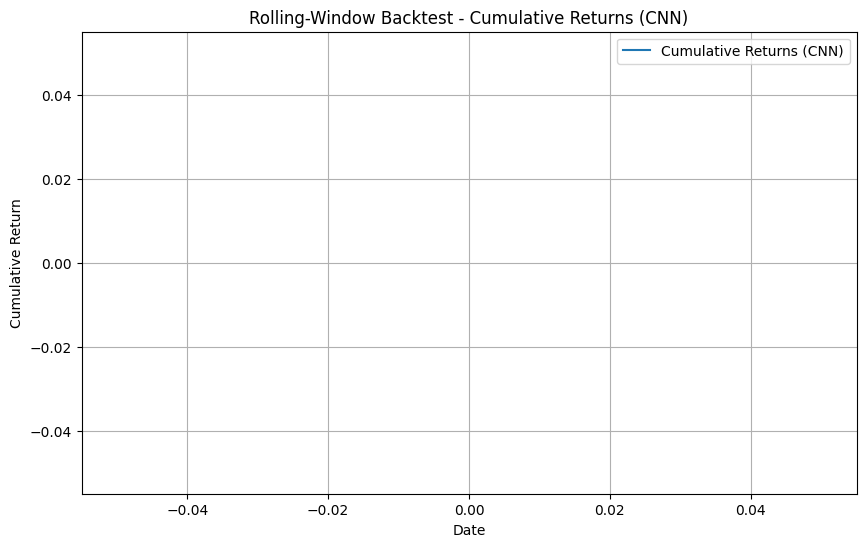

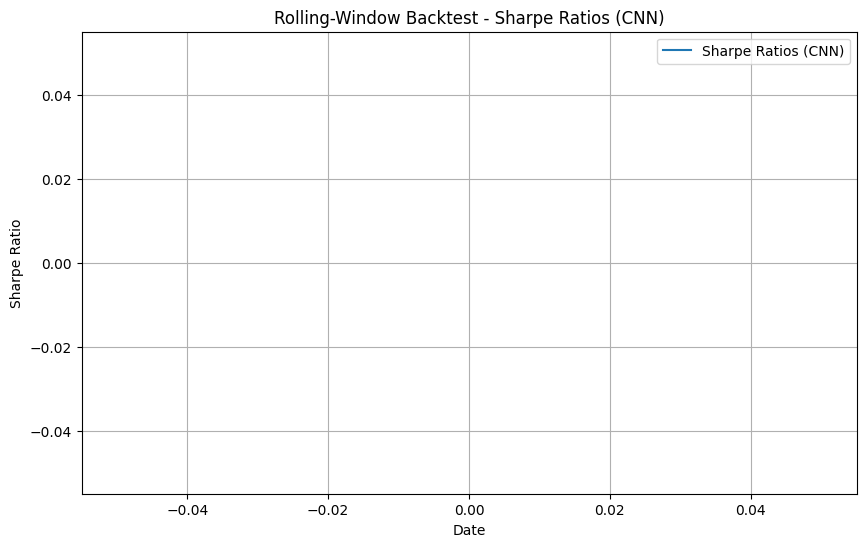

In [42]:
# Run the CNN-based rolling window backtest
cumulative_returns_cnn, sharpe_ratios_cnn, dates_cnn = rolling_window_backtest_cnn(ticker_data)

# Plot Cumulative Returns Over Time
plt.figure(figsize=(10, 6))
plt.plot(dates_cnn, cumulative_returns_cnn, label="Cumulative Returns (CNN)")
plt.title("Rolling-Window Backtest - Cumulative Returns (CNN)")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.show()

# Plot Sharpe Ratios Over Time
plt.figure(figsize=(10, 6))
plt.plot(dates_cnn, sharpe_ratios_cnn, label="Sharpe Ratios (CNN)")
plt.title("Rolling-Window Backtest - Sharpe Ratios (CNN)")
plt.xlabel("Date")
plt.ylabel("Sharpe Ratio")
plt.legend()
plt.grid(True)
plt.show()
